# Motivation to Classify or Predict Diabetes

The classification of diabetes is a significant task in healthcare for several reasons

Dataset Content

Pregnancies: Number of times pregnant.

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

BloodPressure: Diastolic blood pressure (mm Hg).

SkinThickness: Triceps skin fold thickness (mm).

Insulin: 2-Hour serum insulin (mu U/ml).

BMI: Body mass index (weight in kg/(height in m)^2).

DiabetesPedigreeFunction

Age: Age (years).

Outcome: '1' denotes patient having diabetes and '0' denotes patient not having diabetes.

In [1]:
# neccessary imports
import pandas as pd
import numpy as np

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


# Import Dataset

In [3]:
data=pd.read_csv('diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [6]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180,78,63,14,59.4,2.420,25,1
413,1,143,74,22,61,26.2,0.256,21,0
83,0,101,65,28,0,24.6,0.237,22,0
655,2,155,52,27,540,38.7,0.240,25,1
151,4,114,65,0,0,21.9,0.432,37,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.duplicated().sum()

0

In [10]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Visualizitaion of Distribution


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

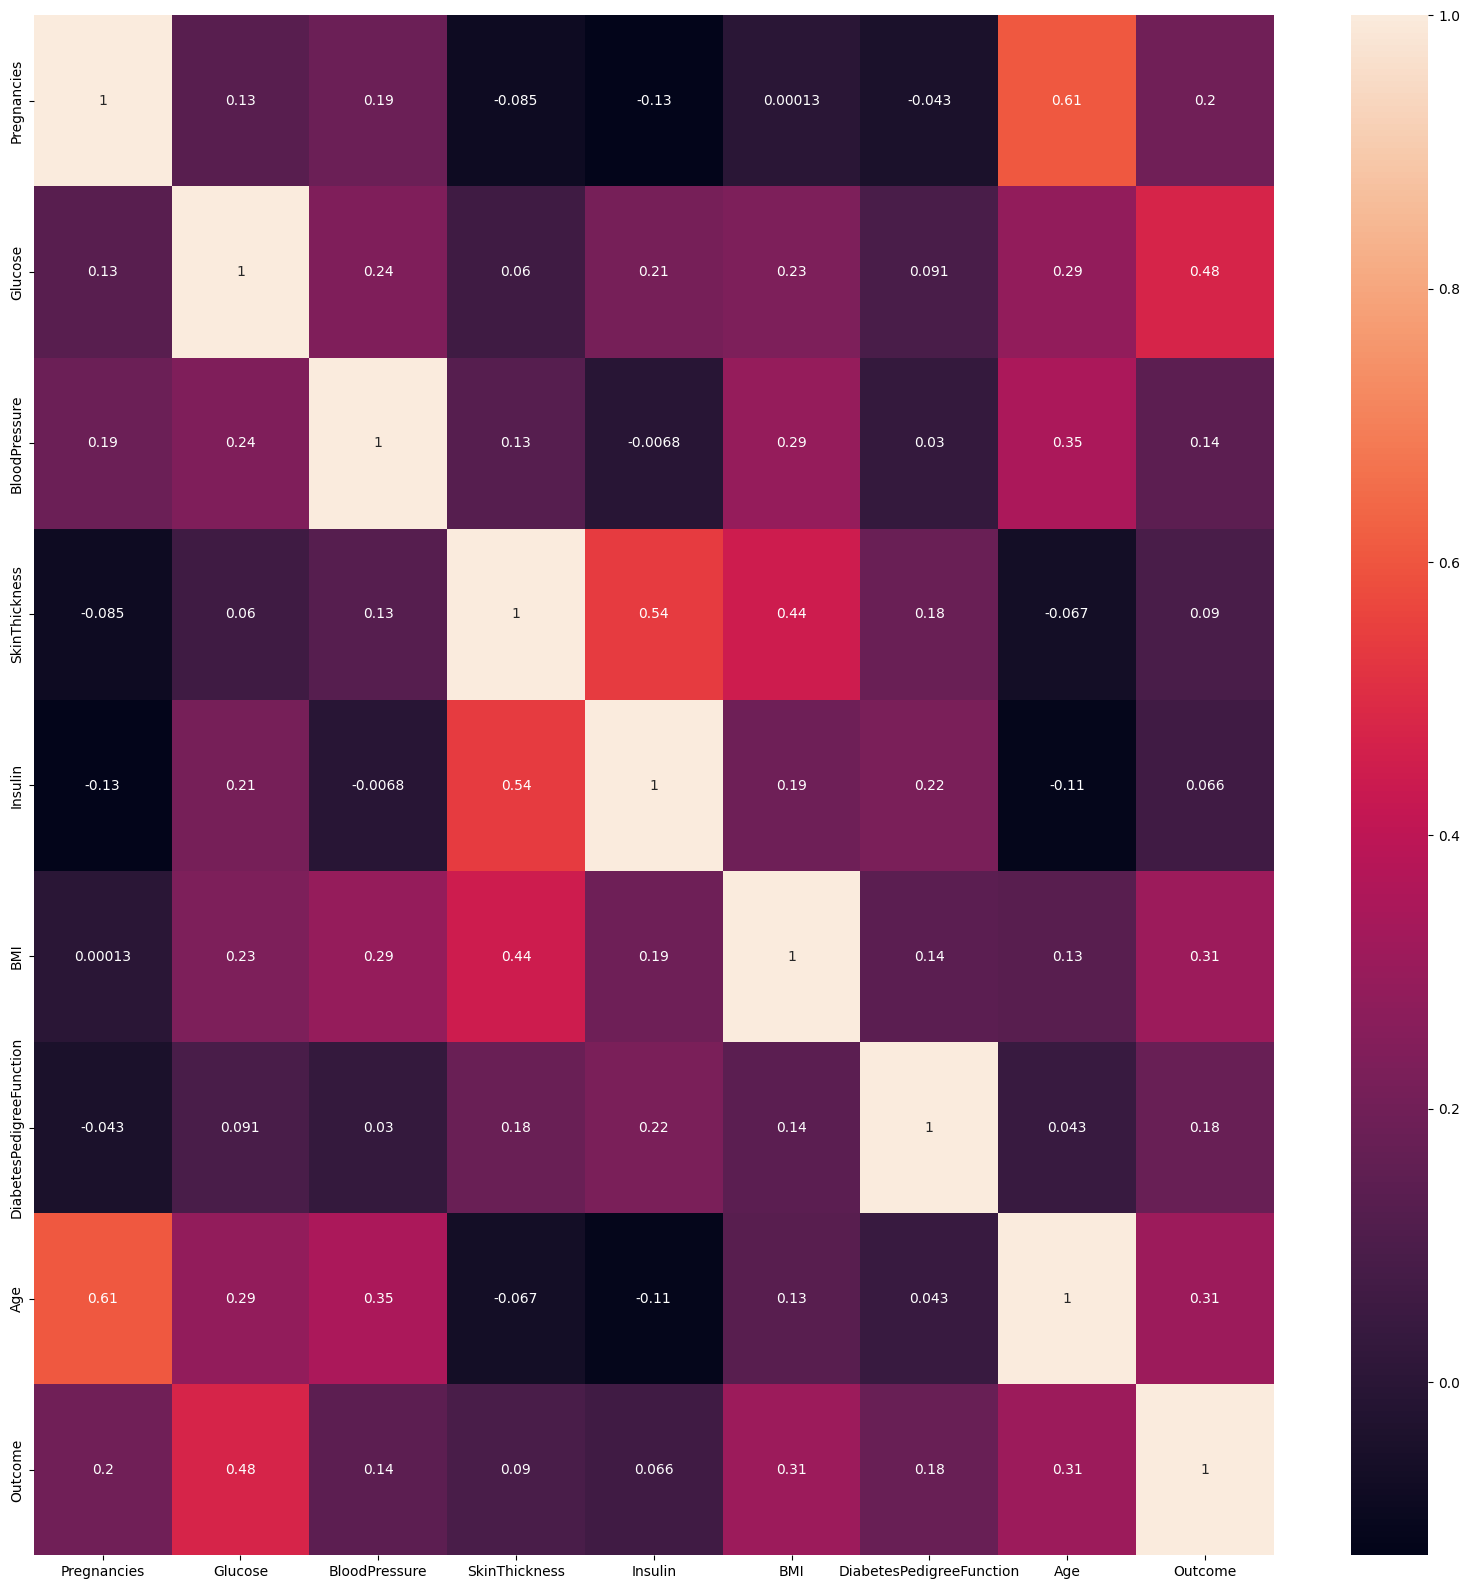

In [12]:
corrmat = data.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [13]:
discrete_feature=[feature for feature in data if len(data[feature].unique())<25]
continuous_feature = [feature for feature in data if feature not in discrete_feature]

In [14]:
continuous_feature

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [15]:
discrete_feature

['Pregnancies', 'Outcome']

C:\Users\HP\AppData\Local\Temp\ipykernel_13760\1958349283.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


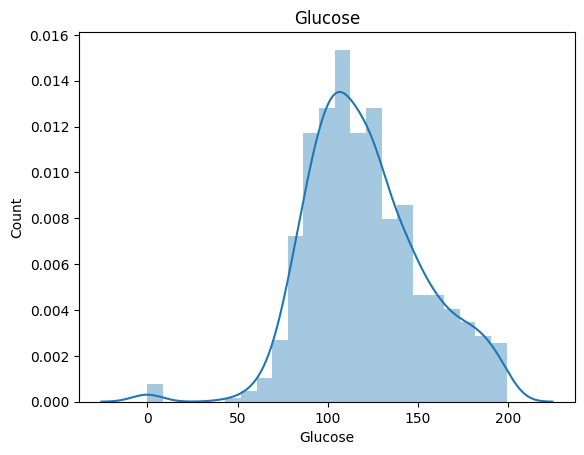

<Figure size 1500x1500 with 0 Axes>

C:\Users\HP\AppData\Local\Temp\ipykernel_13760\1958349283.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


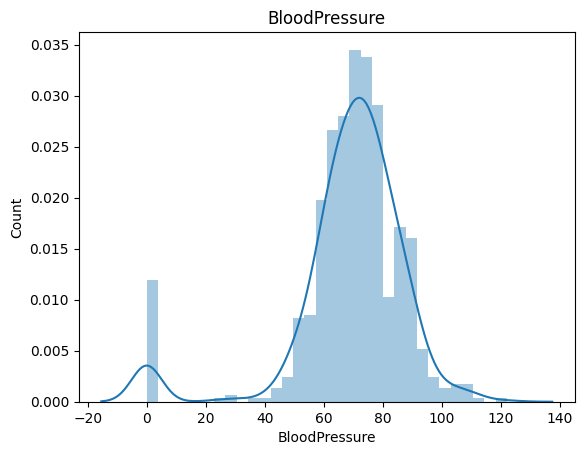

<Figure size 1500x1500 with 0 Axes>

C:\Users\HP\AppData\Local\Temp\ipykernel_13760\1958349283.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


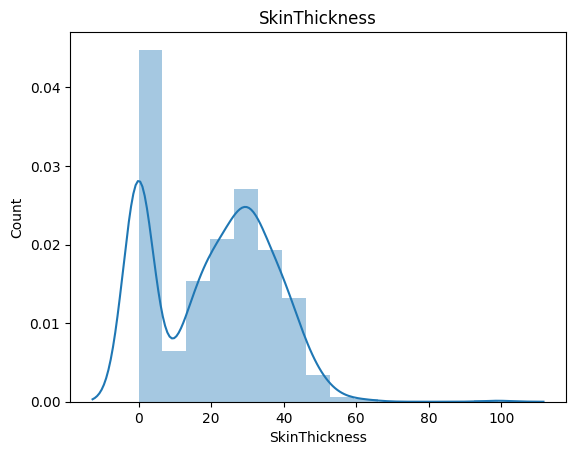

<Figure size 1500x1500 with 0 Axes>

C:\Users\HP\AppData\Local\Temp\ipykernel_13760\1958349283.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


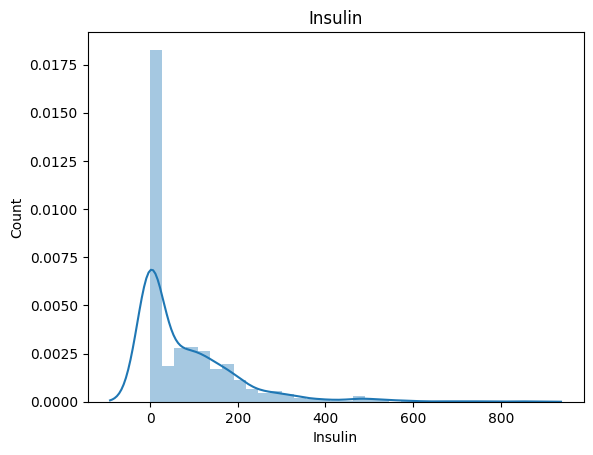

<Figure size 1500x1500 with 0 Axes>

C:\Users\HP\AppData\Local\Temp\ipykernel_13760\1958349283.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


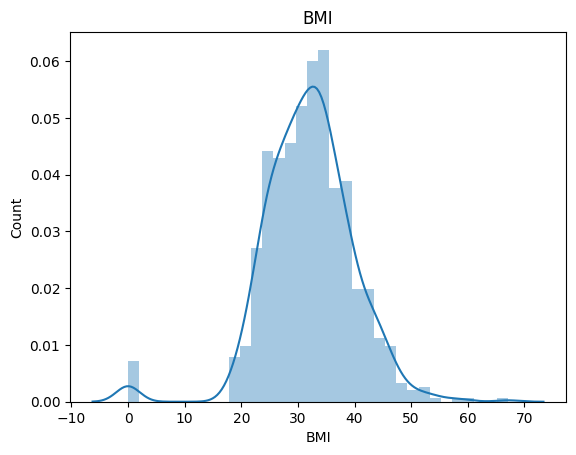

<Figure size 1500x1500 with 0 Axes>

C:\Users\HP\AppData\Local\Temp\ipykernel_13760\1958349283.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


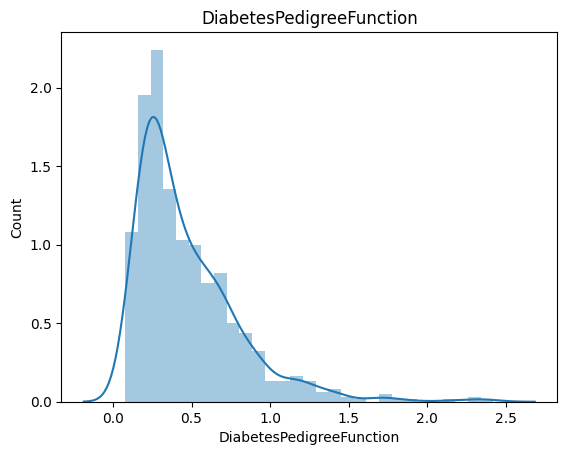

<Figure size 1500x1500 with 0 Axes>

C:\Users\HP\AppData\Local\Temp\ipykernel_13760\1958349283.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


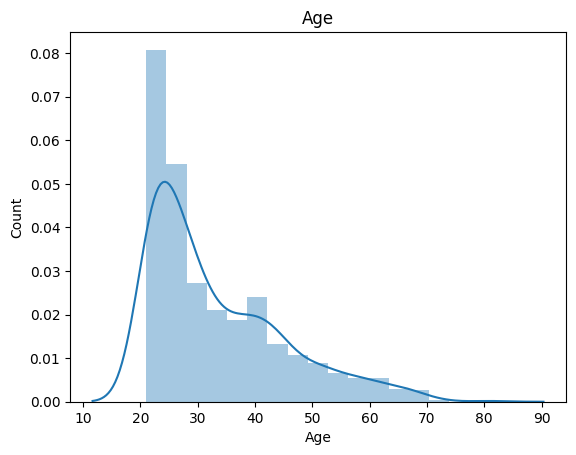

<Figure size 1500x1500 with 0 Axes>

In [16]:
for feature in continuous_feature:
    df=data.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

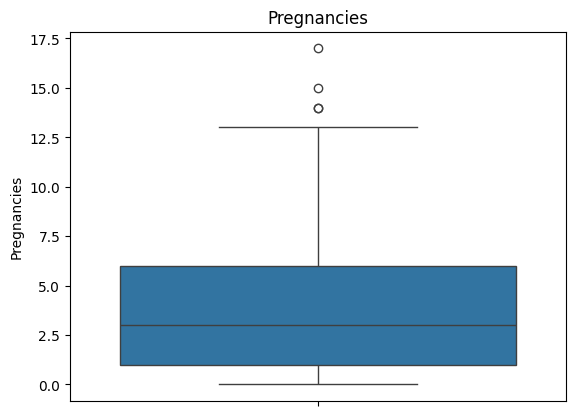

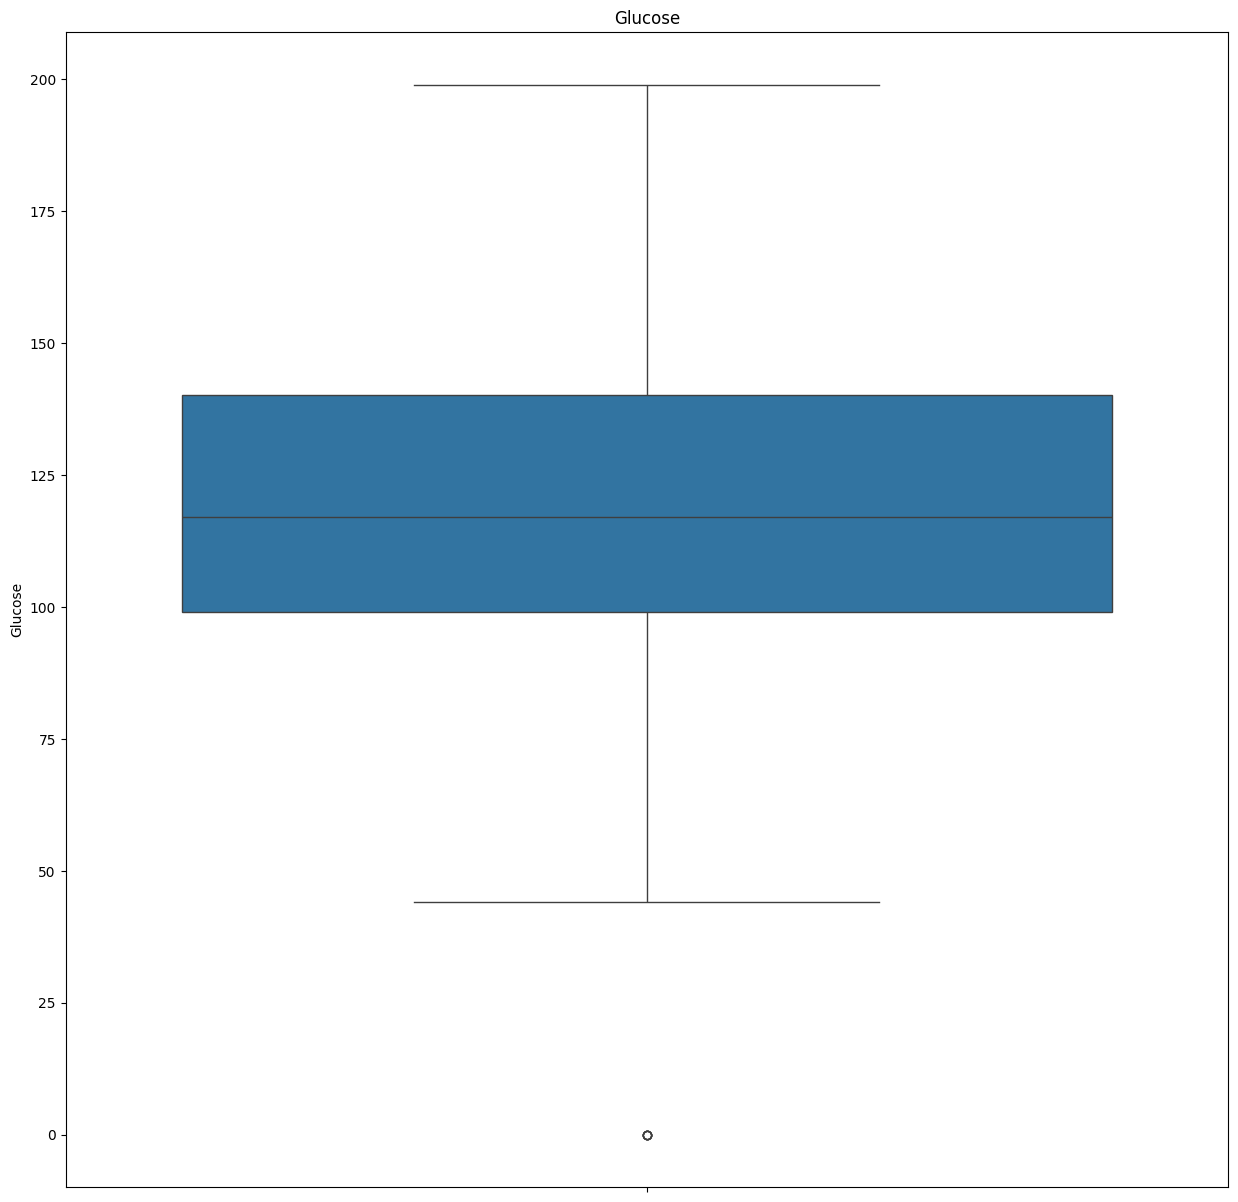

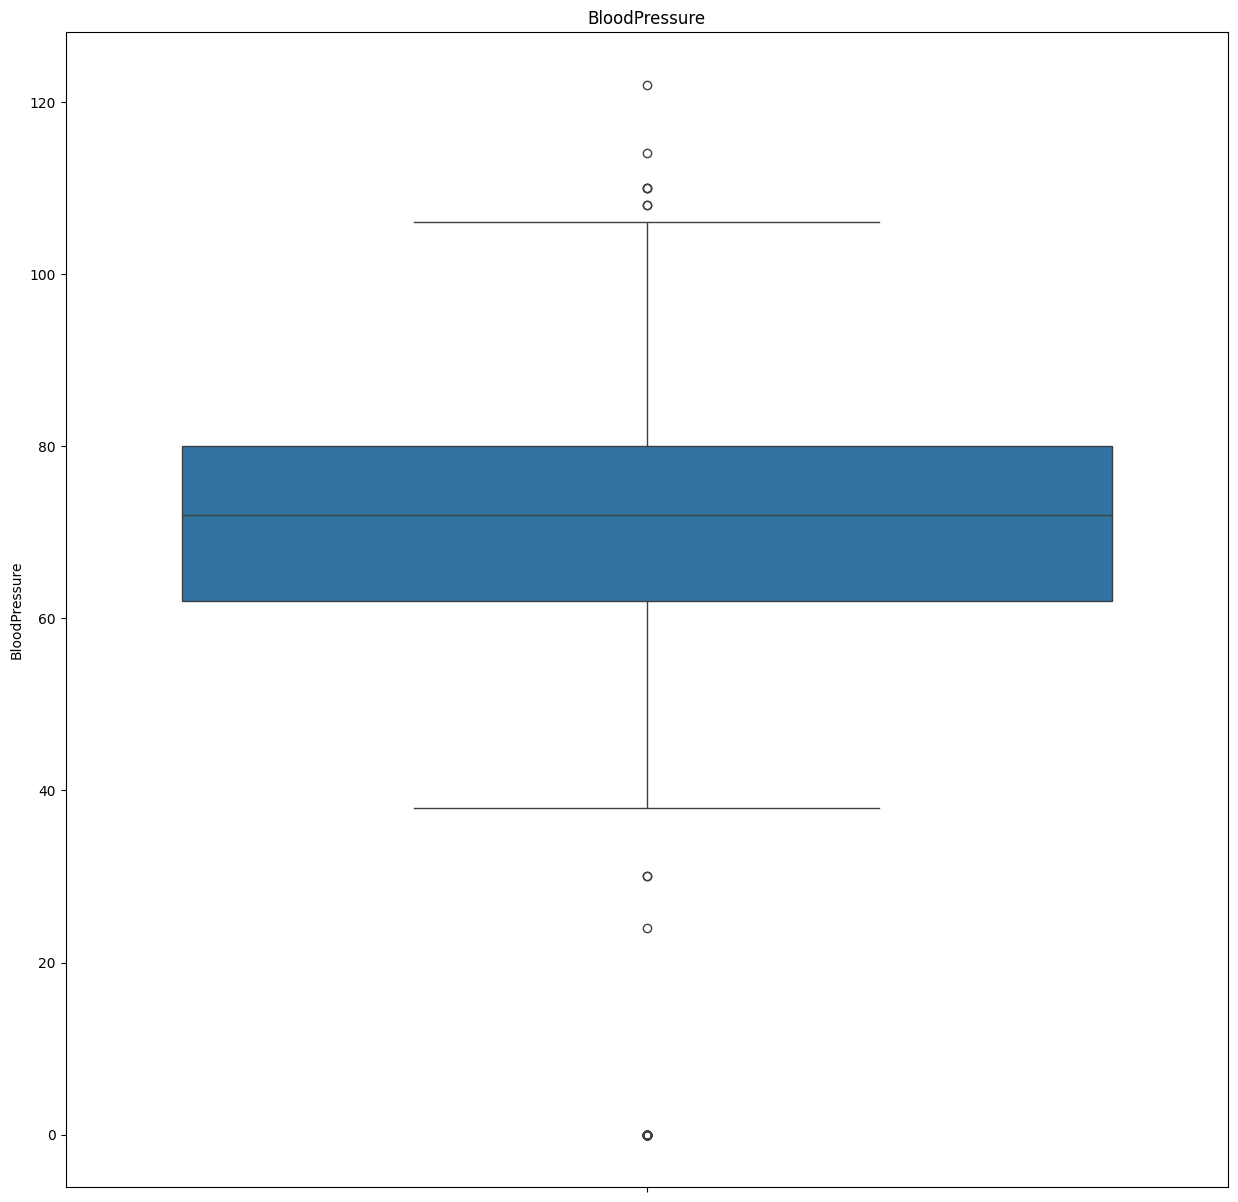

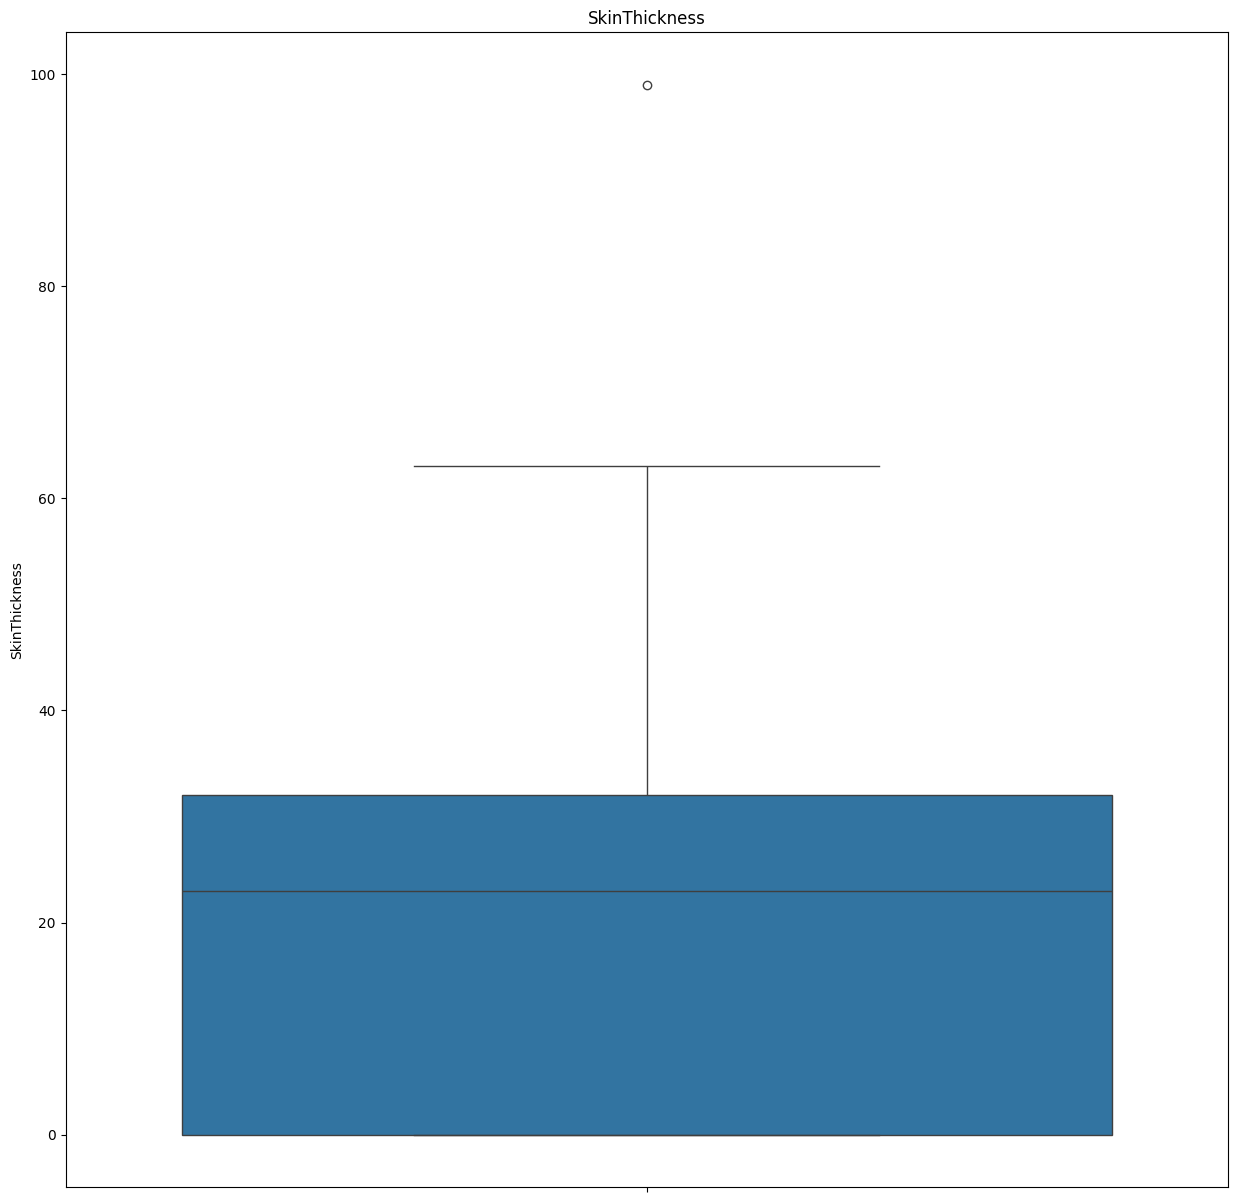

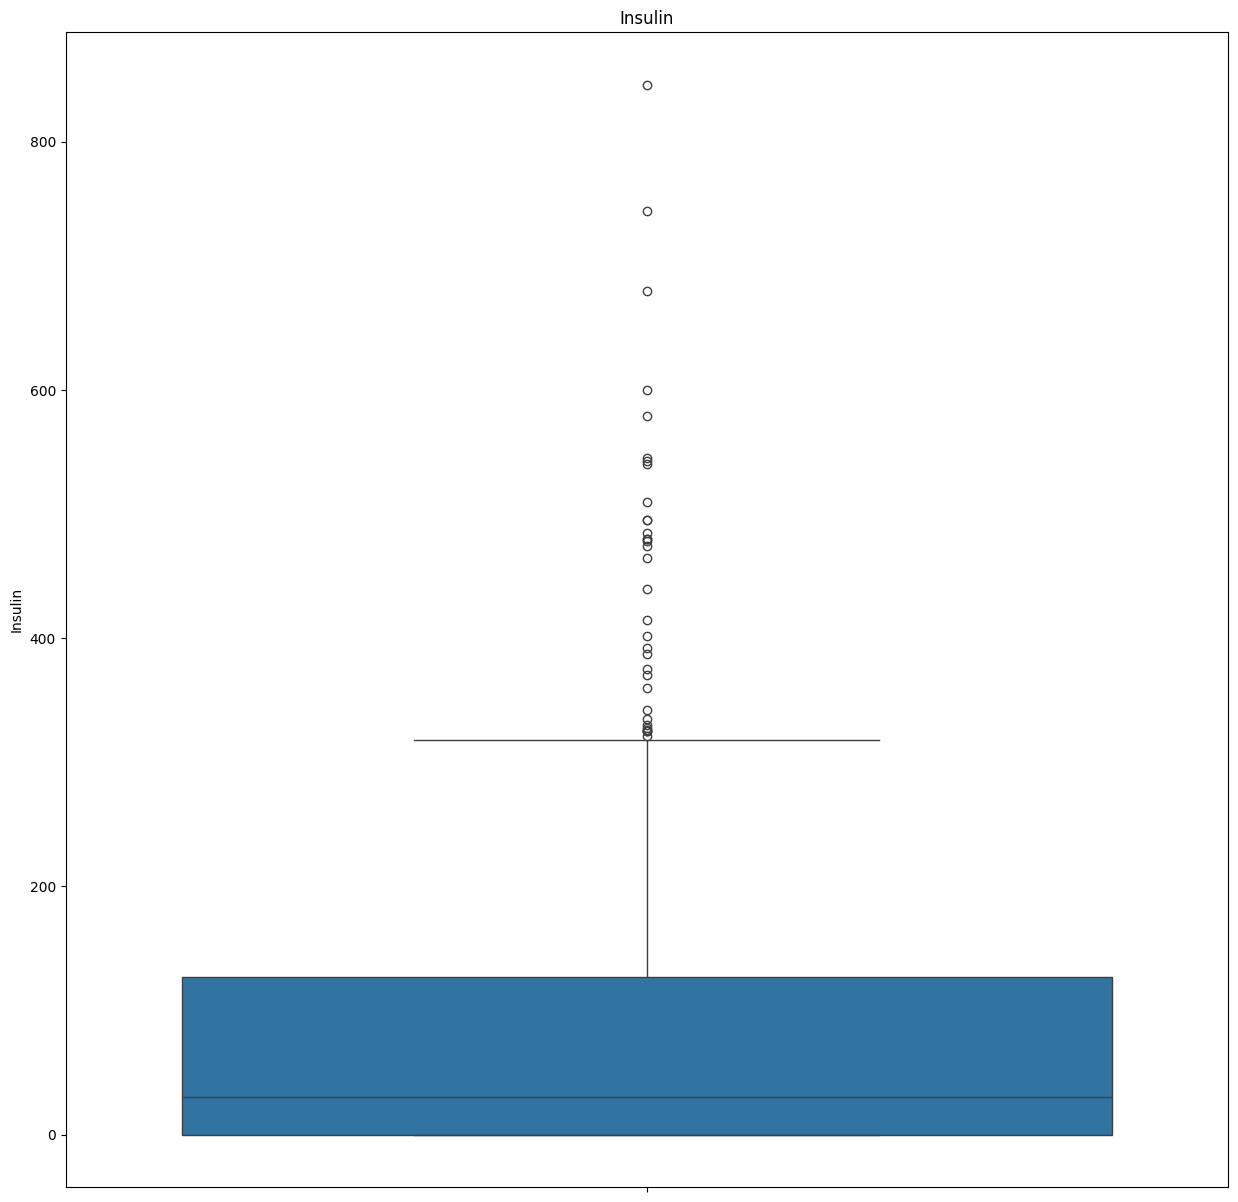

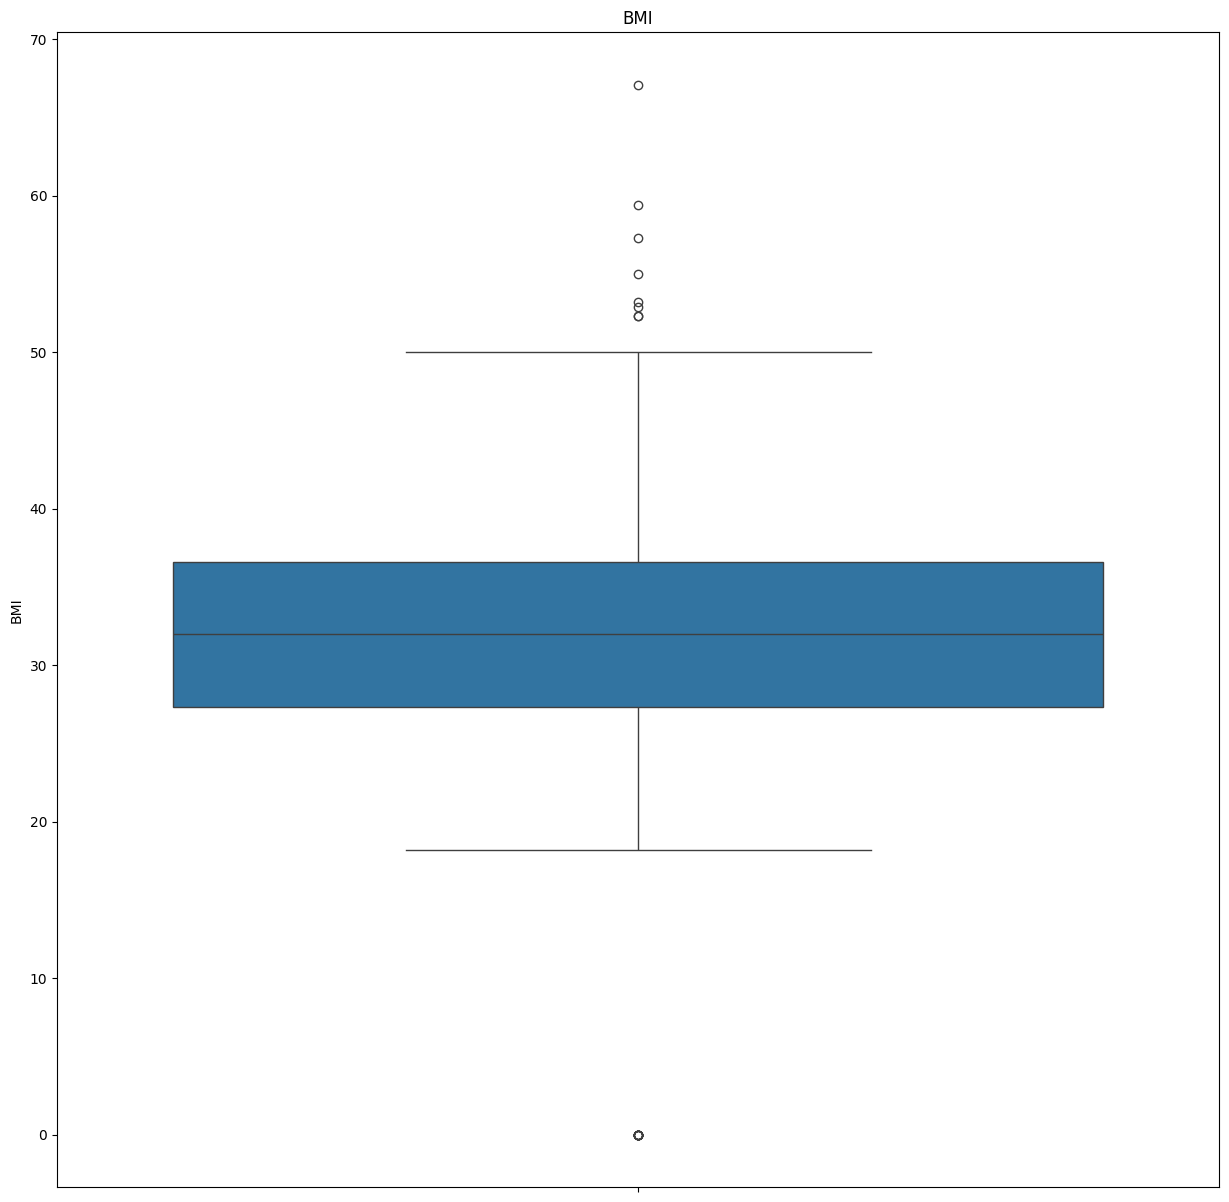

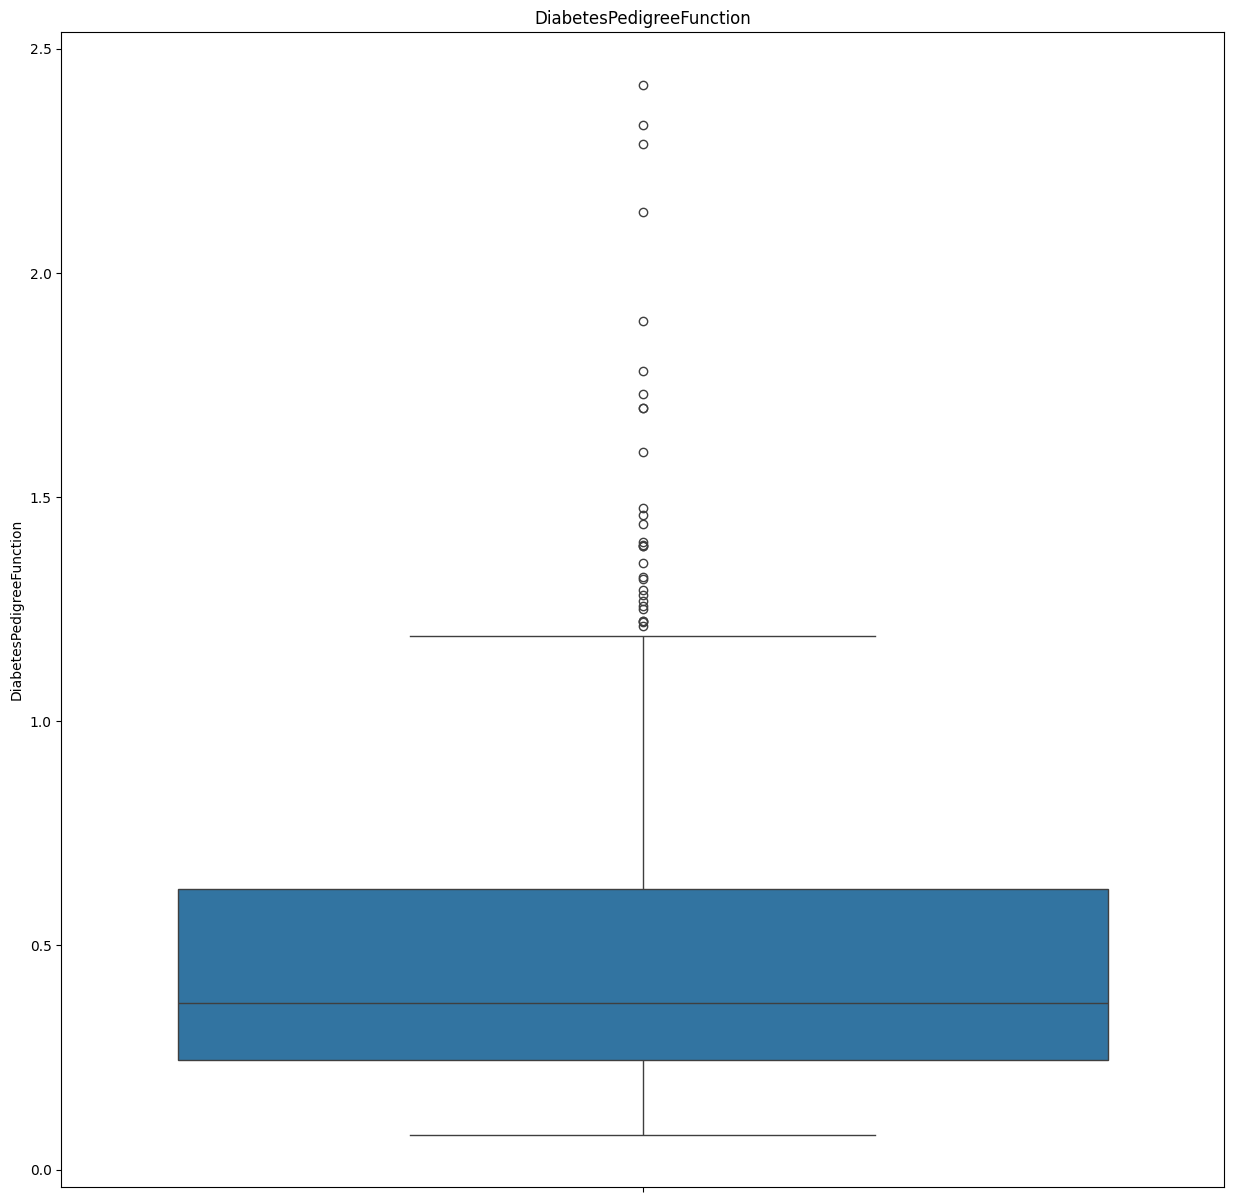

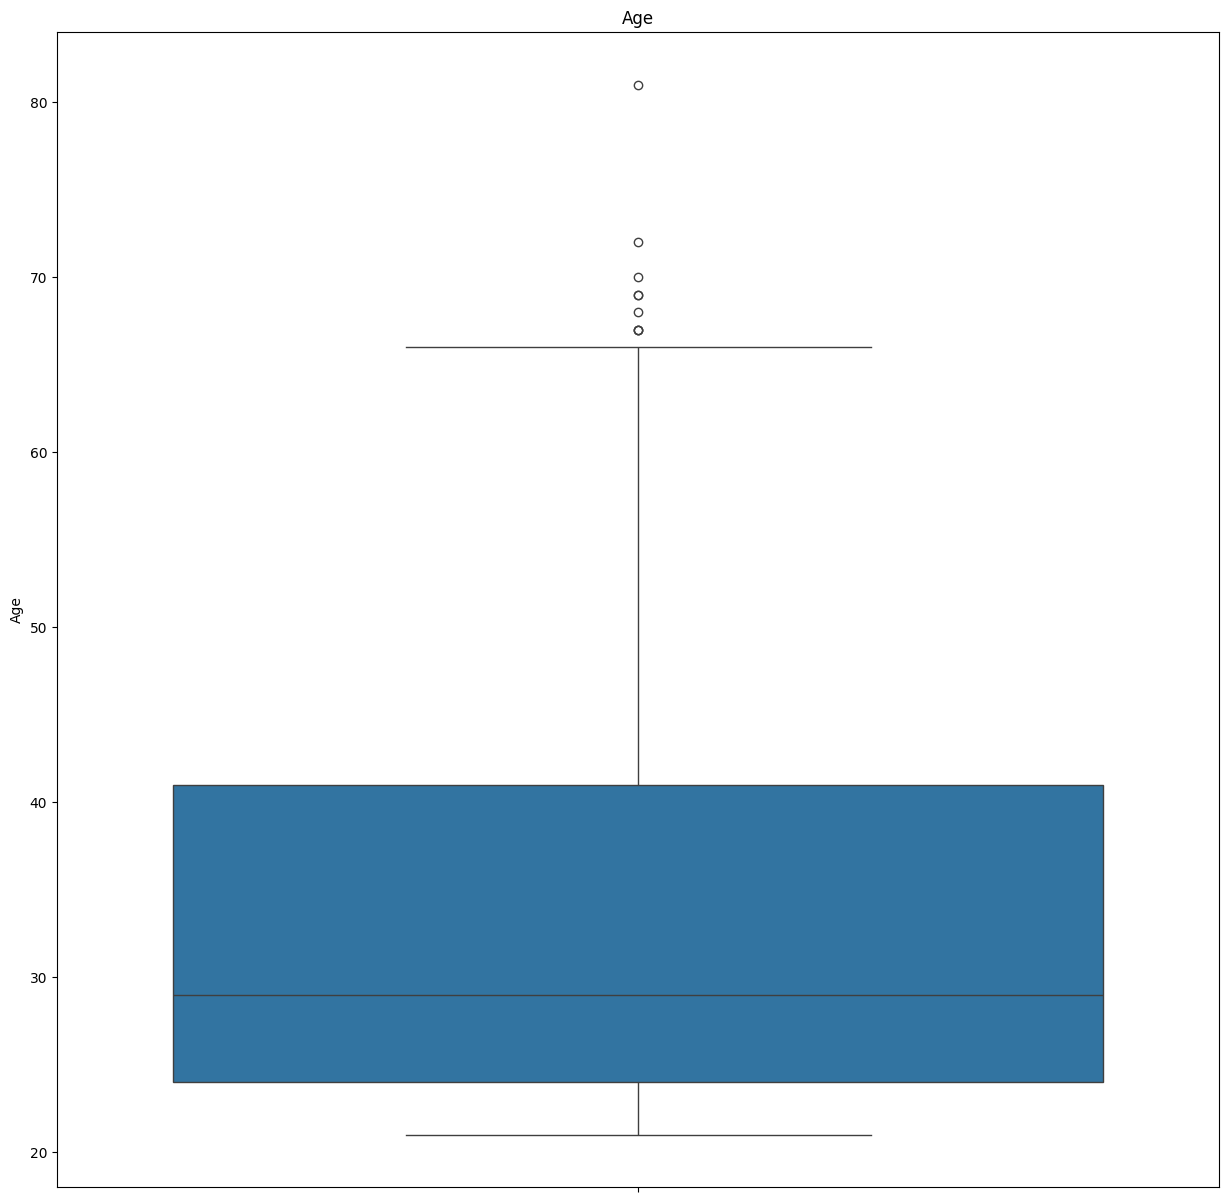

<Figure size 1500x1500 with 0 Axes>

In [17]:
for feature in df:
  if feature != 'Outcome':
    df=data.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [18]:
aggregations = ['mean', 'max','min']
result = df.groupby("Outcome").agg(aggregations)


In [19]:
result.transpose()

Outcome                                 0           1
Pregnancies              mean    3.298000    4.865672
                         max    13.000000   17.000000
                         min     0.000000    0.000000
Glucose                  mean  109.980000  141.257463
                         max   197.000000  199.000000
                         min     0.000000    0.000000
BloodPressure            mean   68.184000   70.824627
                         max   122.000000  114.000000
                         min     0.000000    0.000000
SkinThickness            mean   19.664000   22.164179
                         max    60.000000   99.000000
                         min     0.000000    0.000000
Insulin                  mean   68.792000  100.335821
                         max   744.000000  846.000000
                         min     0.000000    0.000000
BMI                      mean   30.304200   35.142537
                         max    57.300000   67.100000
                         min     0.000000    0.000000
DiabetesPedigreeFunction mean    0.429734    0.550500
                         max     2.329000    2.420000
                         min     0.078000    0.088000
Age                      mean   31.190000   37.067164
                         max    81.000000   70.000000
                         min    21.000000   21.000000

In [20]:
# Counting the occurrences of Glucose values less than 10
implausible_values = (df["Glucose"] <= 10).value_counts()
print(implausible_values)


Glucose
False    763
True       5
Name: count, dtype: int64


In [21]:
(df["Glucose"] == 0).value_counts()

Glucose
False    763
True       5
Name: count, dtype: int64

A glucose level of zero is not possible in living humans so we remove them

In [22]:
df=df[df['Glucose']!=0]

<Axes: ylabel='Glucose'>

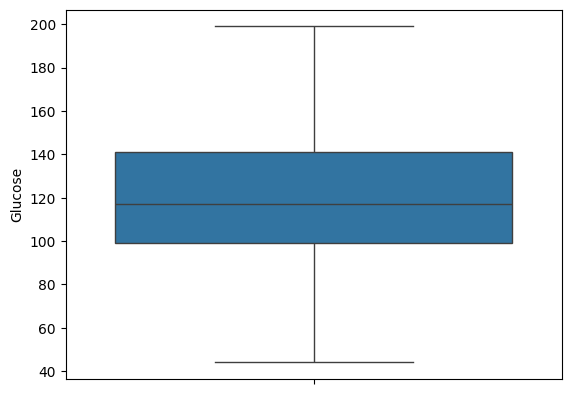

In [23]:
sns.boxplot(df['Glucose'])

In [24]:
(df["BloodPressure"] == 0).value_counts()

BloodPressure
False    728
True      35
Name: count, dtype: int64

A BloodPressure of zero is not possible in living humans so we remove them

In [25]:
df=df[df['BloodPressure']!=0]

<Axes: ylabel='BloodPressure'>

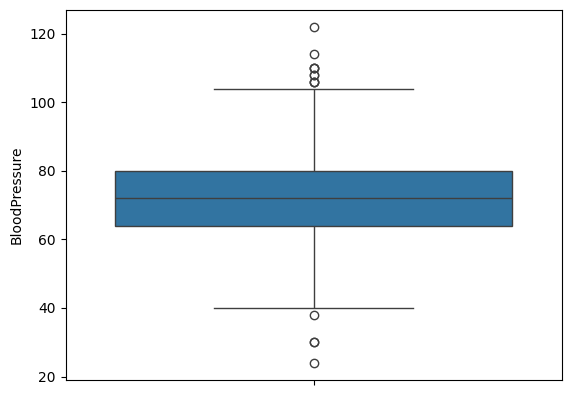

In [26]:
sns.boxplot(df['BloodPressure'])

In [27]:
(df["BloodPressure"] <= 5).value_counts()

BloodPressure
False    728
Name: count, dtype: int64

0/0 mmHg: Not possible. A reading of zero indicates no blood flow.

10/5 mmHg: Generally considered too low to sustain normal physiological functions.

In [28]:
(df["BMI"] <= 5).value_counts()

BMI
False    724
True       4
Name: count, dtype: int64

Since in our dataset minimumn age is 21 so a BMI of 5 is not realistic for a 21-year-old.

A BMI of 10 is technically possible but is extremely low and typically indicates severe underweight or malnutrition. For a 21-year-old

In [29]:
(df["BMI"] == 0).value_counts()

BMI
False    724
True       4
Name: count, dtype: int64

In [30]:
df=df[df['BMI']!=0]

Age and Diabetespdegreefunction is posssible in real life so they are not outliers

Given the nature of the diabetes dataset, the presence of extreme values in columns like Glucose, BloodPressure, SkinThickness, Insulin, and BMI could represent real clinical conditions, particularly in patients with severe cases of diabetes. Therefore, removing these outliers outright might result in losing valuable information that the model could use to identify high-risk patients.

<Axes: xlabel='Outcome', ylabel='count'>

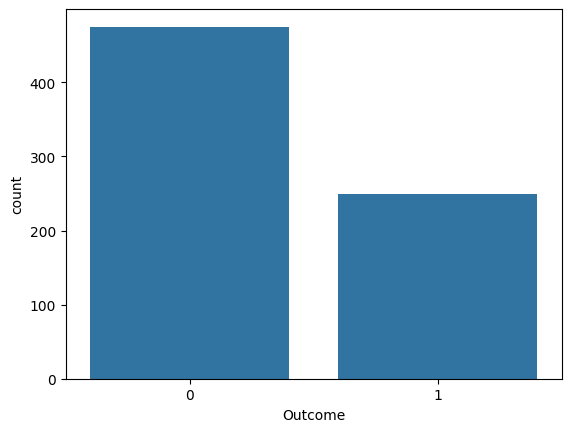

In [31]:
sns.countplot(x='Outcome',data=df)

C:\Users\HP\AppData\Local\Temp\ipykernel_13760\63108427.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pregnancies', data=df, palette='viridis')


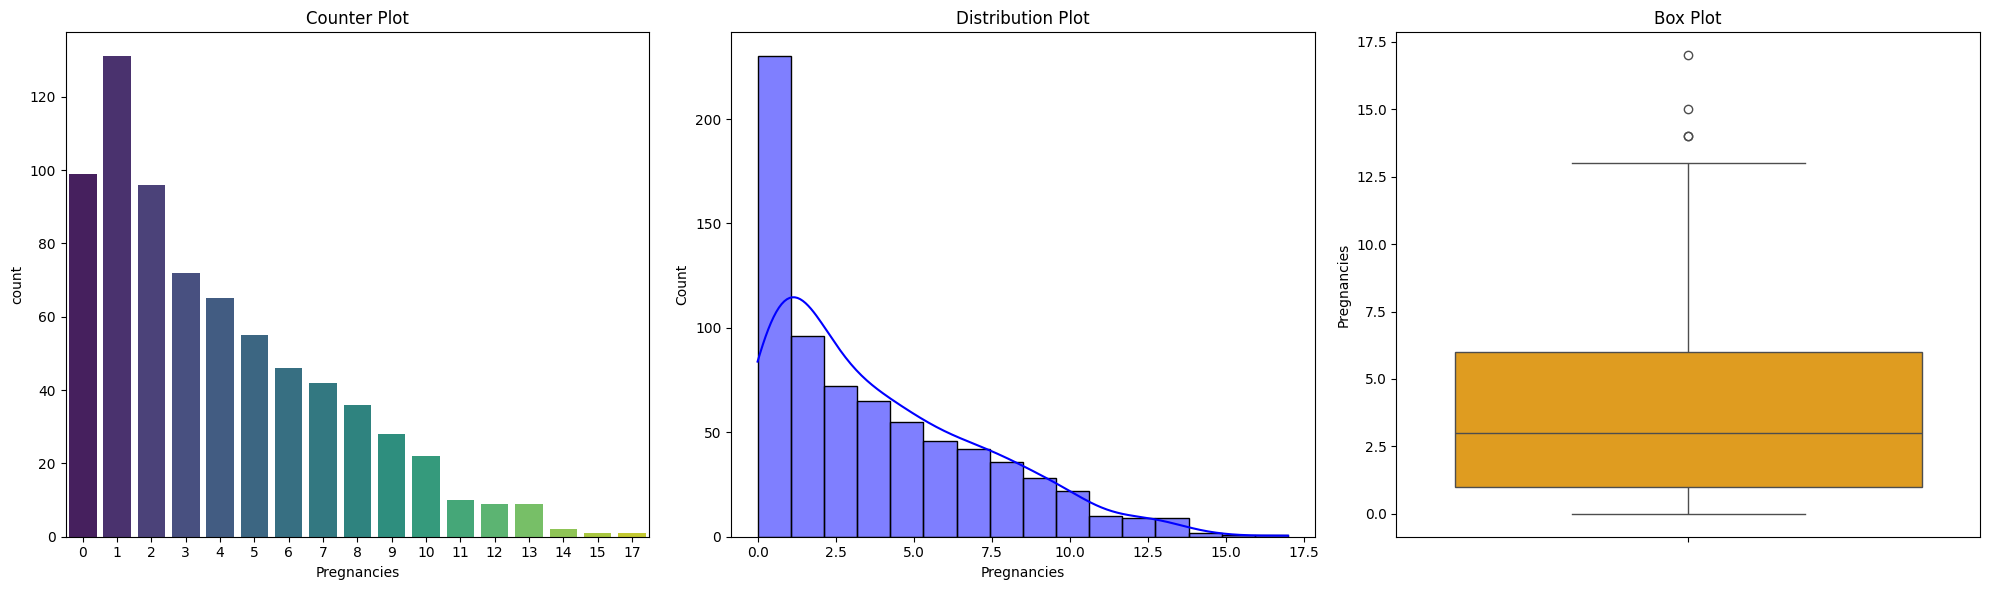

In [32]:
plt.figure(figsize=(20, 6))

# Counter plot
plt.subplot(1, 3, 1)
plt.title('Counter Plot')
sns.countplot(x='Pregnancies', data=df, palette='viridis')
# Distribution plot
plt.subplot(1, 3, 2)
plt.title('Distribution Plot')
sns.histplot(df['Pregnancies'], kde=True, color='blue')

# Box plot
plt.subplot(1, 3, 3)
plt.title('Box Plot')
sns.boxplot(y=df['Pregnancies'], color='orange')

plt.tight_layout()
plt.show()


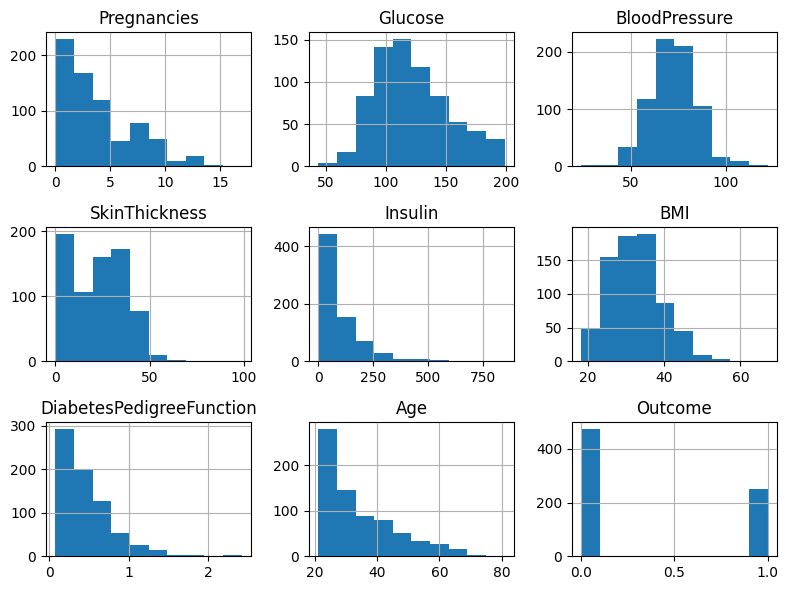

In [33]:
df.hist(figsize=(8,6))
plt.tight_layout()
plt.show()

In [34]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [35]:
df['Outcome'].value_counts()

Outcome
0    475
1    249
Name: count, dtype: int64

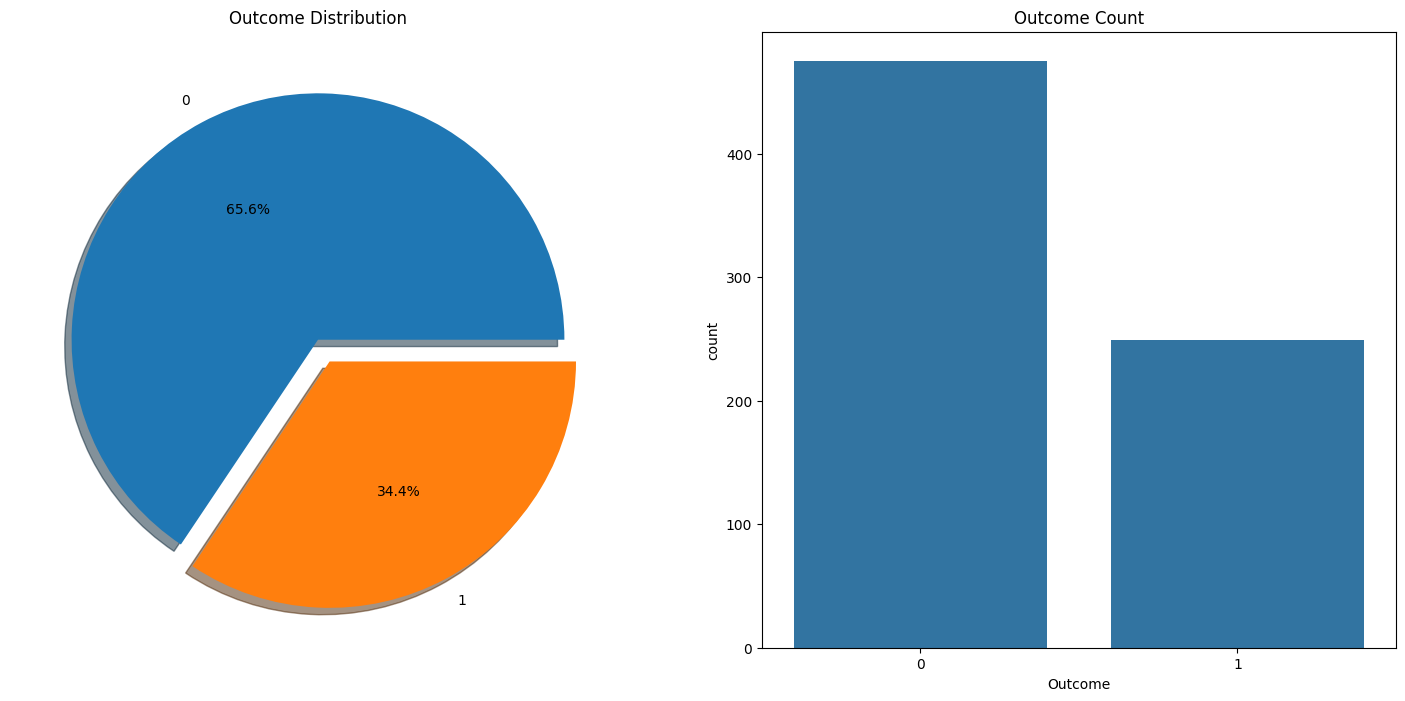

In [36]:
# Create subplots
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart for Outcome distribution
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('Outcome Distribution')
ax[0].set_ylabel('')

# Countplot for Outcome
sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome Count')

# Show the plots
plt.show()

The dataset is imbalanced

In [37]:
corr_matrix = df.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.134915,0.209668,-0.095683,-0.080059,0.012342,-0.025996,0.557066,0.224417
Glucose,0.134915,1.000000,0.223331,0.074381,0.337896,0.223276,0.136630,0.263560,0.488384
BloodPressure,0.209668,0.223331,1.000000,0.011777,-0.046856,0.287403,-0.000075,0.324897,0.166703
SkinThickness,-0.095683,0.074381,0.011777,1.000000,0.420874,0.401528,0.176253,-0.128908,0.092030
Insulin,-0.080059,0.337896,-0.046856,0.420874,1.000000,0.191831,0.182656,-0.049412,0.145488
BMI,0.012342,0.223276,0.287403,0.401528,0.191831,1.000000,0.154858,0.020835,0.299375
DiabetesPedigreeFunction,-0.025996,0.136630,-0.000075,0.176253,0.182656,0.154858,1.000000,0.023098,0.184947
Age,0.557066,0.263560,0.324897,-0.128908,-0.049412,0.020835,0.023098,1.000000,0.245741
Outcome,0.224417,0.488384,0.166703,0.092030,0.145488,0.299375,0.184947,0.245741,1.000000


In [38]:
x=df.drop('Outcome', axis=1)
y= df['Outcome']

In [39]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [40]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 724, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score,confusion_matrix
import joblib

In [44]:
# Define the pipelines
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

In [45]:

pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier(n_estimators=1000))
])

# Oversampling

In [46]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [47]:

# Fit the pipelines (assuming X_train and y_train are defined)
pipeline_rf.fit(X_ros, y_ros)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [48]:
# Make predictions (assuming X_test is defined)
predictions_rf = pipeline_rf.predict(X_test)


In [49]:
accuracy_rf = accuracy_score(y_test, predictions_rf)
recall_rf = recall_score(y_test, predictions_rf)
f1_rf = f1_score(y_test, predictions_rf)

In [50]:
print("Random Forest Metrics after oversampling:")
print("Accuracy:", accuracy_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Random Forest Metrics after oversampling:
Accuracy: 0.7724137931034483
Recall: 0.7441860465116279
F1 Score: 0.6597938144329897


In [51]:
conf_matrix_rf = confusion_matrix(y_test, predictions_rf)
print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)

Confusion Matrix (Random Forest):
 [[80 22]
 [11 32]]


In [52]:
pipeline_gb.fit(X_ros, y_ros)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', GradientBoostingClassifier(n_estimators=1000))])

In [53]:
predictions_gb = pipeline_gb.predict(X_test)

In [54]:
accuracy_rf = accuracy_score(y_test, predictions_gb)
recall_rf = recall_score(y_test, predictions_gb)
f1_rf = f1_score(y_test, predictions_gb)

In [55]:
print("Gradient Boosting Metrics:")
print("Accuracy:", accuracy_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Gradient Boosting Metrics:
Accuracy: 0.7586206896551724
Recall: 0.6046511627906976
F1 Score: 0.5977011494252874


In [56]:
conf_matrix_gb = confusion_matrix(y_test, predictions_gb)
print("Confusion Matrix (Random Forest):\n", conf_matrix_gb)

Confusion Matrix (Random Forest):
 [[84 18]
 [17 26]]


#Undersampling

In [57]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
pipeline_rf.fit(X_rus, y_rus)
predictions_rf = pipeline_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)
recall_rf = recall_score(y_test, predictions_rf)
f1_rf = f1_score(y_test, predictions_rf)
print("Random Forest Metrics after Undersampling:")
print("Accuracy:", accuracy_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
conf_matrix_rf = confusion_matrix(y_test, predictions_rf)
print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)

Random Forest Metrics after Undersampling:
Accuracy: 0.7586206896551724
Recall: 0.7674418604651163
F1 Score: 0.6534653465346535
Confusion Matrix (Random Forest):
 [[77 25]
 [10 33]]


In [58]:
joblib.dump(pipeline_rf, 'pipeline_rf.pkl')

['pipeline_rf.pkl']

In [59]:
pipeline_gb.fit(X_rus, y_rus)
predictions_gb = pipeline_gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, predictions_gb)
recall_gb = recall_score(y_test, predictions_gb)
f1_gb = f1_score(y_test, predictions_gb)
print("Random Forest Metrics after Undersampling:")
print("Accuracy:", accuracy_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)
conf_matrix_gb = confusion_matrix(y_test, predictions_gb)
print("Confusion Matrix (Random Forest):\n", conf_matrix_gb)

Random Forest Metrics after Undersampling:
Accuracy: 0.7379310344827587
Recall: 0.7906976744186046
F1 Score: 0.6415094339622641
Confusion Matrix (Random Forest):
 [[73 29]
 [ 9 34]]


#Smote

In [60]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
pipeline_rf.fit(X_smote, y_smote)
predictions_rf = pipeline_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)
recall_rf = recall_score(y_test, predictions_rf)
f1_rf = f1_score(y_test, predictions_rf)
print("Random Forest Metrics after Smote:")
print("Accuracy:", accuracy_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
conf_matrix_rf = confusion_matrix(y_test, predictions_rf)
print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)

Random Forest Metrics after Smote:
Accuracy: 0.7862068965517242
Recall: 0.7441860465116279
F1 Score: 0.6736842105263158
Confusion Matrix (Random Forest):
 [[82 20]
 [11 32]]


In [61]:
pipeline_gb.fit(X_smote, y_smote)
predictions_gb = pipeline_gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, predictions_gb)
recall_gb = recall_score(y_test, predictions_gb)
f1_gb = f1_score(y_test, predictions_gb)
print("Random Forest Metrics after Smote:")
print("Accuracy:", accuracy_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)
conf_matrix_gb = confusion_matrix(y_test, predictions_gb)
print("Confusion Matrix (Random Forest):\n", conf_matrix_gb)

Random Forest Metrics after Smote:
Accuracy: 0.7793103448275862
Recall: 0.6744186046511628
F1 Score: 0.6444444444444445
Confusion Matrix (Random Forest):
 [[84 18]
 [14 29]]


Conclusion

For a diabetes prediction project, recall is crucial as it helps ensure that as many patients with diabetes as possible are identified. In this case:

Random Forest after Undersampling (First) has the highest recall (0.837) and a relatively high F1 Score (0.673), making it the best choice for identifying patients with diabetes.

Random Forest after SMOTE and Random Forest after Oversampling also perform well with high accuracy and good F1 Scores but have slightly lower recall compared to the undersampling approaches.